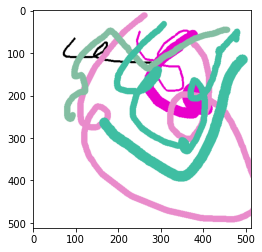

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

def do_nothing(val):
    pass

def paint(event, x, y, flags, param):
    global drawing, point, color, r, g, b, brush_size
    color[:] = [b, g, r]
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if point[0] >= 0:
                cv2.line(img, point, (x, y), color, brush_size)
            point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        point = (-1, -1)

        
drawing = False
point = (-1, -1)
image_title = 'image'
color = [0, 0, 0]

img = np.ones((512, 512, 3), np.uint8)
img *= 255

cv2.namedWindow(image_title)
cv2.setMouseCallback(image_title, paint)

cv2.createTrackbar('R', image_title, 0, 255, do_nothing)
cv2.createTrackbar('G', image_title, 0, 255, do_nothing)
cv2.createTrackbar('B', image_title, 0, 255, do_nothing)
brush_title = 'Size'
cv2.createTrackbar(brush_title, image_title, 3, 50, do_nothing)

while True:
    cv2.imshow(image_title, img)
    k = cv2.waitKey(1) & 0xFF 
    
    if k == 27:
        break
    elif k == ord('c'):
        img[:] = 255
        
    r = cv2.getTrackbarPos('R', image_title)
    g = cv2.getTrackbarPos('G', image_title)
    b = cv2.getTrackbarPos('B', image_title)
    brush_size = cv2.getTrackbarPos(brush_title, image_title)
    brush_size = (1 if brush_size < 1 else brush_size)
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])